In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset

df = pd.read_csv('/content/digital_marketing_campaign_dataset.csv')

# Display basic info
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    800


Descriptive Statistics:
        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269     

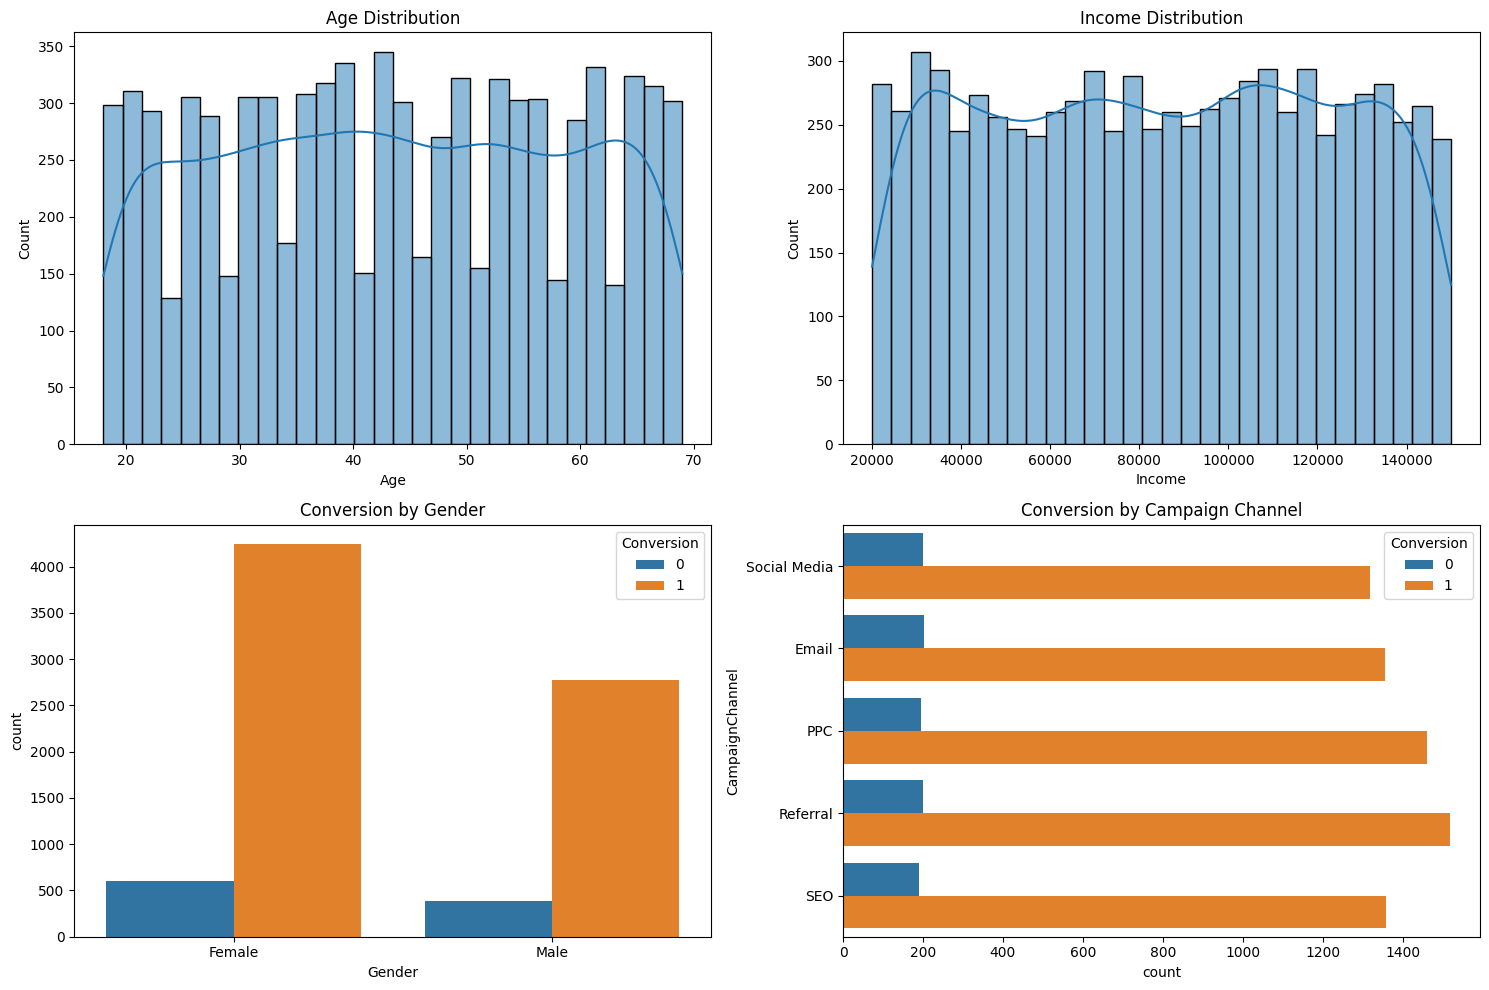

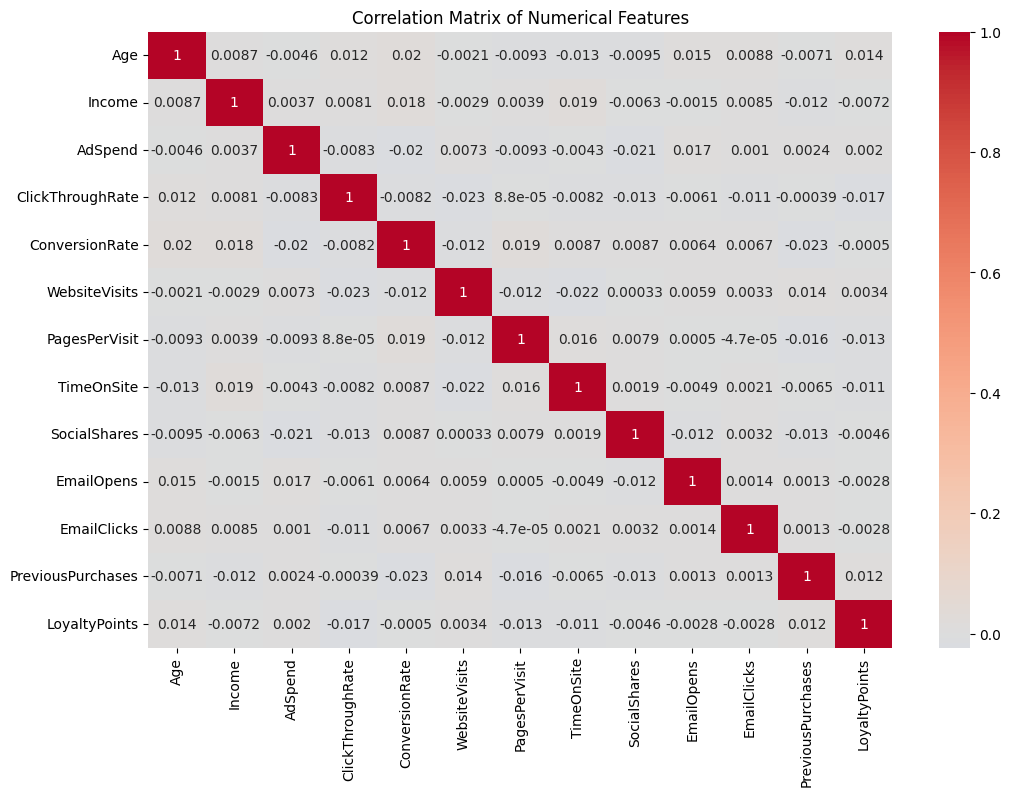

In [2]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nConversion Distribution:")
print(df['Conversion'].value_counts(normalize=True))

# Visualizations
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')

# Conversion by Gender
plt.subplot(2, 2, 3)
sns.countplot(x='Gender', hue='Conversion', data=df)
plt.title('Conversion by Gender')

# Conversion by Campaign Channel
plt.subplot(2, 2, 4)
sns.countplot(y='CampaignChannel', hue='Conversion', data=df)
plt.title('Conversion by Campaign Channel')

plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
numerical_features = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                     'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                     'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [3]:
# Drop CustomerID as it's not a useful feature
df = df.drop('CustomerID', axis=1)

# Define features and target
X = df.drop('Conversion', axis=1)
y = df['Conversion']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical and numerical features
categorical_features = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.71      0.42       198
           1       0.95      0.76      0.85      1402

    accuracy                           0.76      1600
   macro avg       0.62      0.74      0.63      1600
weighted avg       0.87      0.76      0.79      1600



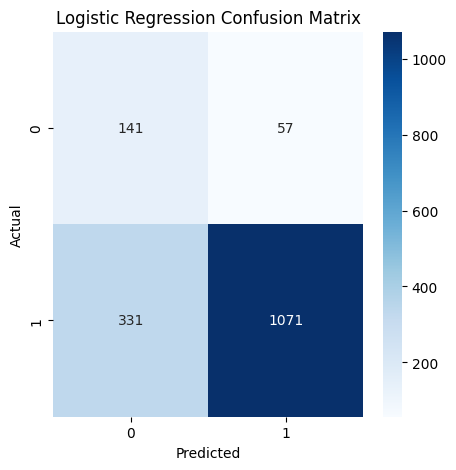


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.34      0.46       198
           1       0.91      0.98      0.95      1402

    accuracy                           0.90      1600
   macro avg       0.81      0.66      0.70      1600
weighted avg       0.89      0.90      0.88      1600



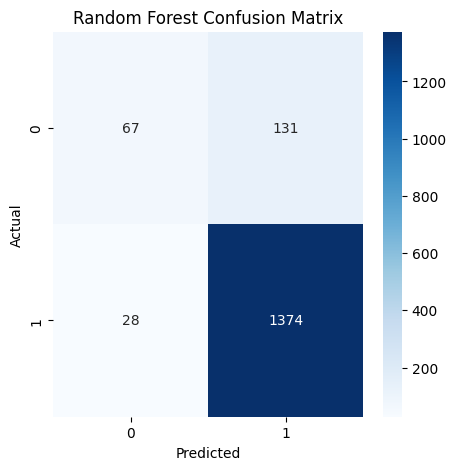


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58       198
           1       0.93      0.98      0.95      1402

    accuracy                           0.92      1600
   macro avg       0.85      0.72      0.77      1600
weighted avg       0.91      0.92      0.91      1600



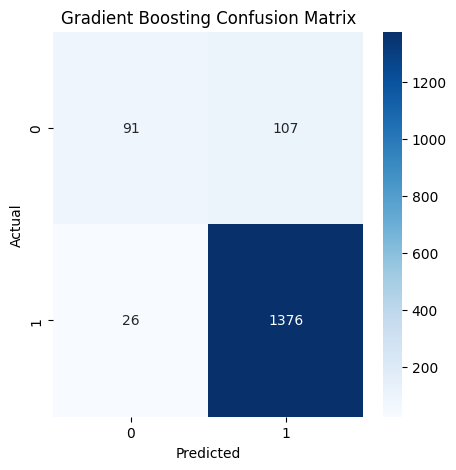


Model Comparison:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.757500   0.949468  0.763909  0.846640  0.779100
Random Forest        0.900625   0.912957  0.980029  0.945304  0.796831
Gradient Boosting    0.916875   0.927849  0.981455  0.953899  0.811294


In [4]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Create a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'model': pipeline
    }

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare model performance
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Comparison:")
print(results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']])

In [5]:
# Select the best performing model for tuning (Gradient Boosting in this case)
best_model_name = 'Gradient Boosting'
best_pipeline = results[best_model_name]['model']

# Define parameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=best_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nBest Model Parameters:")
print(grid_search.best_params_)

print("\nBest Model Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Update results
results['Tuned Gradient Boosting'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_prob),
    'model': best_model
}

# Final model comparison
final_results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nFinal Model Comparison:")
print(final_results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']])

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Model Parameters:
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Best Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.44      0.57       198
           1       0.93      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.88      0.71      0.76      1600
weighted avg       0.91      0.92      0.91      1600

ROC AUC Score: 0.8051

Final Model Comparison:
                         accuracy  precision    recall        f1   roc_auc
Logistic Regression      0.757500   0.949468  0.763909  0.846640  0.779100
Random Forest            0.900625   0.912957  0.980029  0.945304  0.796831
Gradient Boosting        0.916875   0.927849  0.981455  0.953899  0.811294
Tuned Gradient Boosting  0.919375   0.925753  0.987161  0.955471  0.805148


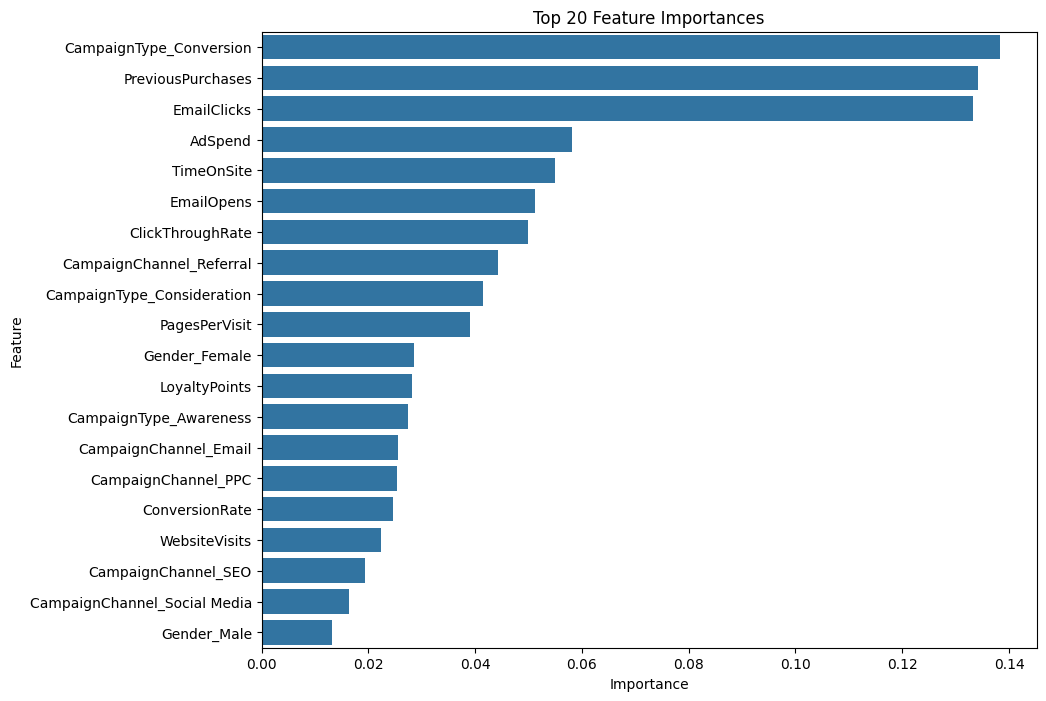


Top 10 Important Features:
                       Feature  Importance
22     CampaignType_Conversion    0.138264
11           PreviousPurchases    0.134196
10                 EmailClicks    0.133285
2                      AdSpend    0.058077
7                   TimeOnSite    0.054992
9                   EmailOpens    0.051177
3             ClickThroughRate    0.049912
17    CampaignChannel_Referral    0.044191
21  CampaignType_Consideration    0.041531
6                PagesPerVisit    0.039111


In [6]:
# Get feature names after one-hot encoding
preprocessor.fit(X_train)
feature_names = numerical_features.copy()

# Add one-hot encoded feature names
ohe_features = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names.extend(ohe_features)

# Get feature importances from the best model
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_

    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
    plt.title('Top 20 Feature Importances')
    plt.show()

    print("\nTop 10 Important Features:")
    print(feature_importances.head(10))
else:
    print("The selected model doesn't support feature importance analysis.")

In [7]:
# Save the best model
joblib.dump(best_model, 'free_trial_conversion_model.pkl')

# Save the column names for future reference
model_metadata = {
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'feature_names': feature_names
}

joblib.dump(model_metadata, 'model_metadata.pkl')

print("Model and metadata saved successfully.")

Model and metadata saved successfully.


In [8]:
# Load the saved model and metadata
loaded_model = joblib.load('free_trial_conversion_model.pkl')
metadata = joblib.load('model_metadata.pkl')

# Create a sample new customer data point
new_customer = pd.DataFrame({
    'Age': [35],
    'Gender': ['Female'],
    'Income': [75000],
    'CampaignChannel': ['Social Media'],
    'CampaignType': ['Awareness'],
    'AdSpend': [2500.0],
    'ClickThroughRate': [0.15],
    'ConversionRate': [0.08],
    'WebsiteVisits': [12],
    'PagesPerVisit': [4.5],
    'TimeOnSite': [8.2],
    'SocialShares': [25],
    'EmailOpens': [5],
    'EmailClicks': [3],
    'PreviousPurchases': [2],
    'LoyaltyPoints': [500],
    'AdvertisingPlatform': ['IsConfid'],
    'AdvertisingTool': ['ToolConfid']
})

# Make prediction
probability = loaded_model.predict_proba(new_customer)[0, 1]
prediction = loaded_model.predict(new_customer)[0]

print(f"\nPrediction for new customer:")
print(f"Conversion Probability: {probability:.2%}")
print(f"Predicted Conversion: {'Yes' if prediction == 1 else 'No'}")


Prediction for new customer:
Conversion Probability: 89.82%
Predicted Conversion: Yes
